In [10]:
# Import Libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt    

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dhair\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dhair\AppData\Roaming\nltk_data...


In [12]:
nltk.download_gui()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [2]:
# Import data

use_cols = ['airline_sentiment', 'text', 'airline']

df = pd.read_csv('C:\OnlyAssignment\EAI6000/Tweets.csv', usecols = use_cols)

df.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


In [5]:
# Lets process the text

stop_words = stopwords.words('english')

df['text_without_stopwords'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

countVect = CountVectorizer(min_df= 10)

binaryVector = countVect.fit_transform(df.text_without_stopwords)

In [6]:
# Seperate dataset into test and train

y = df.airline_sentiment
X = binaryVector

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=123)

print([x.shape for x in [train_X, test_X, train_y, test_y]])

[(10980, 1872), (3660, 1872), (10980,), (3660,)]


In [15]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def removeStopWords(text):
    text = text.split()
    swords = set(stopwords.words("english"))
    text = [w for w in text if w not in swords]
    text = " ".join(text)    
    return text

def lemmateWords(text):
    text = text.split()
    text = [lemmatizer.lemmatize(w) for w in text]
    text = " ".join(text)
    return text

df['text'] = df['text'].apply(lambda twt: removeStopWords(twt))
df['text'] = df['text'].apply(lambda twt: lemmateWords(twt))
df['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus added commercial experienc...
2        @VirginAmerica I today... Must mean I need tak...
3        @VirginAmerica really aggressive blast obnoxio...
4                      @VirginAmerica really big bad thing
                               ...                        
14635     @AmericanAir thank got different flight Chicago.
14636    @AmericanAir leaving 20 minute Late Flight. No...
14637    @AmericanAir Please bring American Airlines #B...
14638    @AmericanAir money, change flight, answer phon...
14639    @AmericanAir 8 ppl need 2 know many seat next ...
Name: text, Length: 14640, dtype: object

In [16]:
# Now for testing the naive bayes model

MNB = MultinomialNB()
MNB.fit(train_X, train_y)

predicted = MNB.predict(test_X)
accuracy_score = metrics.accuracy_score(predicted, test_y)
confusion_count = metrics.confusion_matrix(predicted, test_y)


print('Accuracy: ',accuracy_score,'\n')
print('Confusion Matrix:\n',confusion_count)

Accuracy:  0.7808743169398907 

Confusion Matrix:
 [[2015  304   76]
 [ 186  430   60]
 [ 111   65  413]]


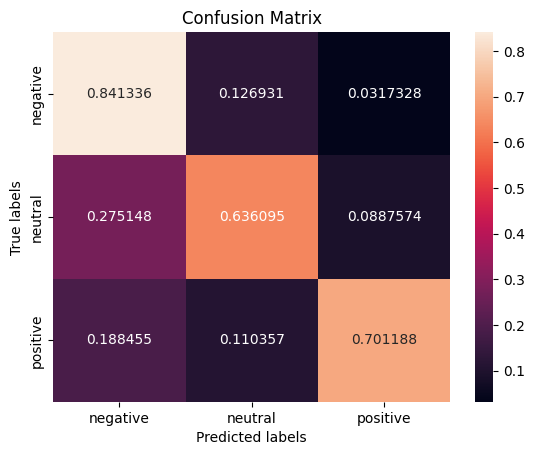

In [17]:
# Lets plot the results properly

confusion = metrics.confusion_matrix(predicted, test_y, normalize = 'true')

ax= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['negative', 'neutral', 'positive']); ax.yaxis.set_ticklabels(['negative', 'neutral', 'positive']);

In [18]:
# Lets look for the most important words

neg_class_prob_sorted = MNB.feature_log_prob_[0, :].argsort()[::-1]
pos_class_prob_sorted = MNB.feature_log_prob_[1, :].argsort()[::-1]

print('Negative words:\n', np.take(countVect.get_feature_names(), neg_class_prob_sorted[:25]))
print('\nPositive words:\n', np.take(countVect.get_feature_names(), pos_class_prob_sorted[:25]))

Negative words:
 ['united' 'flight' 'usairways' 'americanair' 'southwestair' 'jetblue'
 'get' 'cancelled' 'service' 'hours' 'hold' 'can' 'customer' 'help' 'time'
 'plane' 'amp' 'delayed' 'still' 'you' 'us' 'co' 'one' 'call' 'http']

Positive words:
 ['jetblue' 'united' 'southwestair' 'flight' 'co' 'http' 'americanair'
 'usairways' 'get' 'please' 'flights' 'virginamerica' 'need' 'thanks'
 'help' 'can' 'dm' 'would' 'know' 'it' 'our' 'fleek' 'fleet' 'us' 'you']


In [19]:
#These words show a number of airline names so lets compare this with the positive / negative associations for each airline.

piv = df.pivot_table(index=['airline'], columns='airline_sentiment', aggfunc='size', fill_value=0)
piv

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


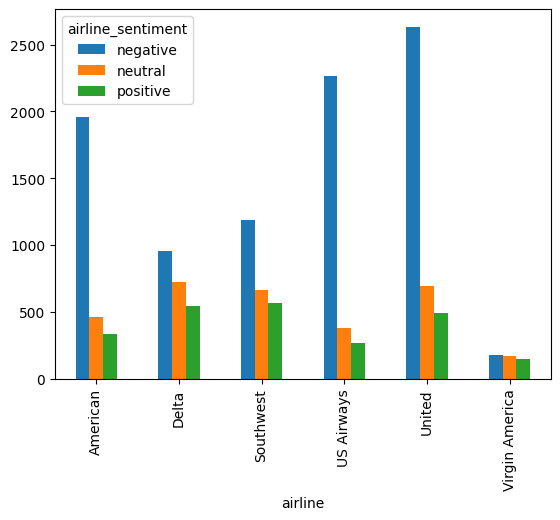

In [20]:
piv.plot(kind='bar')
plt.show()